In [33]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
import math


In [34]:
env=gym.make("Taxi-v3")
env.reset()


(332, {'prob': 1.0, 'action_mask': array([1, 1, 1, 0, 0, 0], dtype=int8)})

In [35]:
num_rows=env.observation_space.n#500
num_columns=env.action_space.n#6

qtable=np.zeros((num_rows,num_columns))
print(qtable)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [36]:
action=2
newstate,reward,term,trunc,info=env.step(action)
print(reward)

-1


In [37]:
#parameters
episodes=2000
alpha=0.5
d=1
minimum=-5
iterations=40

In [38]:
avgr=[0]*iterations
stepstaken=[0]*iterations

for iter in range(iterations):
    qtabletemp=qtable
    c=0
    num_steps=0
    
    for epi in range(episodes):
        state,inf=env.reset()
        done = False
        

        ep=1/(iter+1)
        
        while not done:
            if np.random.uniform(0,1)<ep:
                action=env.action_space.sample()
            else:
                action=np.argmax(qtable[state])
           # else:
                #action=env.action_space.sample()

            newstate,reward,term,trunc,info=env.step(action)
            c+=reward
            num_steps+=1
            
            done =trunc or term
            qtabletemp[state,action]=qtabletemp[state,action]+alpha*(reward+d*np.max(qtable[newstate])-qtabletemp[state,action])
            state=newstate
            #print(reward)
            #print(state)
    c=c/episodes
    num_steps=num_steps/episodes
    
    avgr[iter]=c
    stepstaken[iter]=num_steps
    
    qtable=qtabletemp
print(qtable)
print(avgr)
print(stepstaken)



    

[[ 0.          0.          0.          0.          0.          0.        ]
 [ 9.         10.          9.         10.         11.          1.        ]
 [13.         14.         13.         14.         15.          5.        ]
 ...
 [14.99994795 16.         14.99999789 13.99997539  5.99995993  5.99988445]
 [10.99999777 12.         10.99999953 11.9999997   1.99998238  1.99999807]
 [18.         17.         18.         19.          9.          9.        ]]
[-768.0925, -46.8495, -17.742, -8.837, -4.977, -2.2305, -0.323, 0.8635, 1.8235, 2.5225, 2.682, 3.481, 3.6455, 4.3945, 4.4875, 4.6175, 5.032, 5.0295, 5.149, 5.403, 5.6005, 5.5685, 5.399, 5.919, 6.135, 6.1655, 6.0065, 6.163, 6.174, 6.341, 6.224, 6.3915, 6.5715, 6.53, 6.332, 6.668, 6.5685, 6.6455, 6.7115, 6.73]
[196.2595, 28.884, 20.544, 17.9795, 16.851, 16.0395, 15.608, 15.2225, 14.9915, 14.675, 14.6145, 14.306, 14.299, 14.117, 14.069, 14.083, 13.9475, 13.9905, 13.934, 13.833, 13.7615, 13.7125, 13.828, 13.695, 13.5735, 13.624, 13.6435, 13.6

In [30]:
for i in range (500):
    print(qtable[i])

[0. 0. 0. 0. 0. 0.]
[ 9. 10.  9. 10. 11.  1.]
[13. 14. 13. 14. 15.  5.]
[10. 11. 10. 11. 12.  2.]
[ 3.  2.  3.  2. -7. -7.]
[0. 0. 0. 0. 0. 0.]
[ 3.  2.  3.  2. -7. -7.]
[ 6.  5.  6.  5. -4. -4.]
[11. 10.  9. 10.  1.  1.]
[ 7.  6.  5.  6. -3. -3.]
[0. 0. 0. 0. 0. 0.]
[ 8.  7.  6.  7. -2. -2.]
[ 5.  4.  5.  4. -5. -5.]
[ 7.  6.  7.  6. -3. -3.]
[ 5.  4.  5.  4. -5. -5.]
[0. 0. 0. 0. 0. 0.]
[18. 19. 18. 19. 10. 20.]
[12. 11. 12. 11.  2. 10.]
[16. 15. 14. 15.  6. 14.]
[13. 12. 13. 12.  3. 11.]
[0. 0. 0. 0. 0. 0.]
[ 8.00000000e+000  9.00000000e+000  9.00000000e+000  1.00000000e+001
 -6.26588941e-101 -3.54260147e-110]
[12. 13. 13. 14.  4.  4.]
[ 9. 10. 10. 11.  1.  1.]
[ 4.  3.  3.  2. -6. -6.]
[0. 0. 0. 0. 0. 0.]
[ 4.  3.  3.  2. -6. -6.]
[ 7.  6.  6.  5. -3. -3.]
[ 1.00000000e+01  9.00000000e+00  9.00000000e+00  1.00000000e+01
 -8.47218222e-58 -1.64997193e-66]
[ 6.  5.  5.  6. -4. -4.]
[0. 0. 0. 0. 0. 0.]
[ 7.  6.  6.  7. -3. -3.]
[ 6.  5.  5.  4. -4. -4.]
[ 8.  7.  7.  6. -2. -2.]
[ 6.  

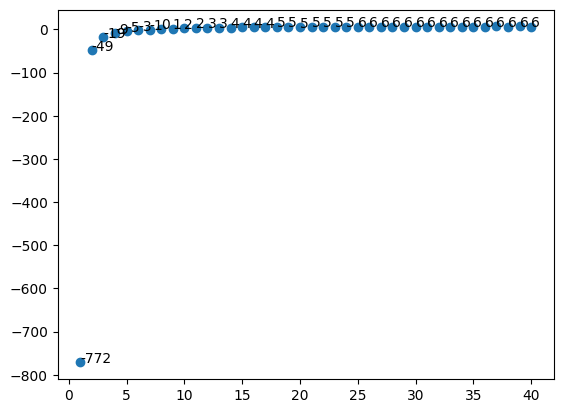

In [32]:
x=[i+1 for i in range(iterations)]
plt.scatter(x,avgr)
for i in range (iterations):
    plt.annotate(math.floor(avgr[i]),(x[i],avgr[i]))

plt.show()